# Create A Starship Sound from Scratch with Python

In this first tutorial, we will show how to create a sound from scratch and listen it using python. We will use *numpy* to synthesize a sine wave and *matplotlibµ to display it.

In [97]:
import numpy as np
import matplotlib.pyplot as plt

## Synthesize A Sine Wave

A monophonic sound can be described by a function $x(t)$ where $t$ corresponds to the continous time. In this tutorial, we will synthesize a sine wave with frequency $f_0=1000$ Hz. 



In [98]:
f0 = 1000

The function can then be expressed as

$$x(t)=sin(2\pi f_0 t)$$

Unfortunately, a computer cannot deal with continuous time signals. Instead, we will create the digital signal $x[n]$ by sampling the value of $t$. More specifically, we propose to use the following sampling

$$t[n] = n/F_s$$

where $n$ is an integer and $F_s$ corresponds to the sampling frequency. In the following, we will use the standard sampling frequency $F_s=44100$ Hz (used first in the Compact Disc Format). To construct the vector $t[n]$, we can use a for loop, however it is more efficient to use the fonctionnalities of the numpy library. In numpy, the function `arange(t0,tend,step)` can automatically generate a vector of the form `t = t0 + n*step` ranging from $t_0$ (included) to $t_{end}$ (excluded). 

<div class="alert alert-info">
    The documentation of the arange function can be found <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html">here</a>
</div>



Finally, a digital sine wave of $1$ second can be synthesized using the following python code. Note that I use the `sin` function of the numpy library to evaluate $x(t)$ automatically for each value of the vector `t`.

In [99]:
Fe = 44100
t = np.arange(0,1,1/Fe)   #create vector t = [0/Fe,1/Fe,2/Fe,...,1[
x = np.sin(2*np.pi*f0*t)  #synthesize the sine wave

Next, it's time to show your synthesized sine wave with matplotlib. Note that, I simply show the sine wave for $t$ ranging from 0 to 0.01s. You could try to represent the whole waveform but you will have some difficulties to clearly interpret the waveform (try it if you don't believe me :))

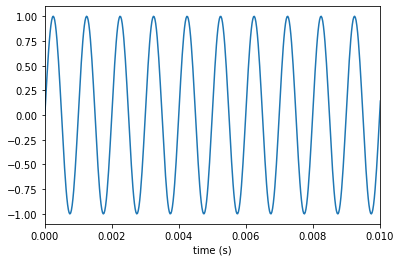

In [100]:
plt.plot(t,x)
plt.xlim([0,0.01])
plt.xlabel("time (s)");

## Listen the result

To play a sound directly in our browser, we can use the class Audio of the Ipython package. In the following, we will send two inputs to the constructor of the Audio class :

* `x` : the numpy array containing the sound samples,
* `rate` : the sampling frequency


<div class="alert alert-info">
    The documentation of the Audio class can be found <a href="https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#module-IPython.display">here</a>
</div>


In [101]:
from IPython.display import Audio

Audio(x, rate=Fe) 

## It's your time to play !

Now, you know how to create a simple sound with python. You can easily modify the python code to synthesize more creative sounds. For example, you can :

* change the value of $f_0$,
* add several sine waves with different frequencies, amplitudes and phases to `x`,
* add other types of waveforms using the incredible list of [mathematical functions](https://docs.scipy.org/doc/numpy/reference/routines.math.html) included in numpy. Classical choices include the square or triangle waveform.
* Modulate the parameter of your waveform by other waveform. Two classical modulations are

    * Amplitude modulation : 
    
    $$x(t)=(1+\alpha \times sin(2\pi f_m t)) \times sin(2\pi f_0 t)$$
    
    * Phase modulation :
    
    $$x(t)=sin(2\pi f_0 t + \alpha \times sin(2\pi f_m t))$$
   
For example, the new code shows how to create a random starship sound composed of 10 sinewaves.

In [104]:
from numpy.random import uniform

t = np.arange(0,10,1/Fe)   
x = np.zeros(len(t))

for l in range(10):
    a, a_am, a_pm, f0, f_am, f_pm = uniform(size = 6)
    
    x_am = 1+a_am*np.sin(2*np.pi*10*f_am*t)
    x_pm = a_pm*np.sin(2*np.pi*50*f_pm*t)
    x += a*x_am*np.sin(2*np.pi*1500*f0*t+x_pm) #sound with amplitude and phase modulation for extreme pleasure !!!
    
Audio(x, rate=Fe) 